# Computational Social Science Project #3 

**Evelyn Ortiz Soto**

*Semester:* Fall 2025

## 1. Introduction

### Load data 

In [23]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [24]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [25]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [26]:
# list column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [27]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [28]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

In [29]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

Let's visualize what the distribution of results looks like.

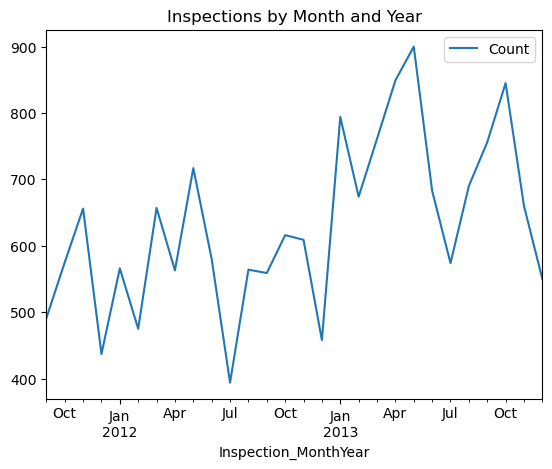

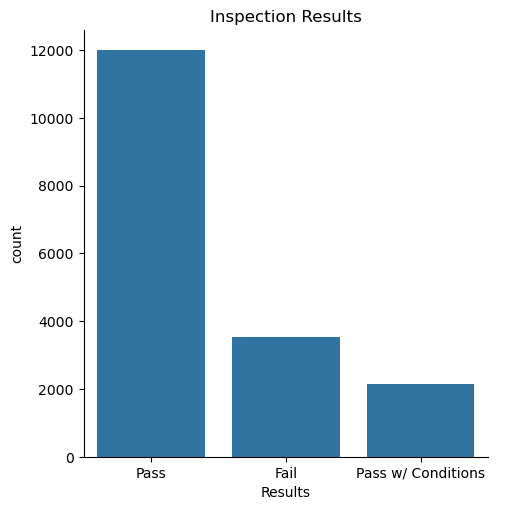

In [30]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

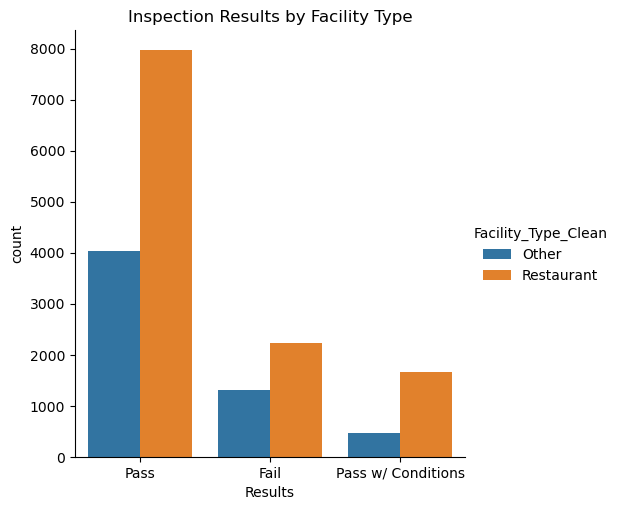

In [31]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [32]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                   
                                                                                   
                                                                                   
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [33]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable 
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# Since my goal is to develop an algorithm to help the Department of Public Health prioritize...
# establishments to audit, I figured a binary classification made most sense to prioritize high-risk given there are limited funds. 

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)


# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)

In [34]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`). 

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

In [37]:
# Split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for validation
    random_state=42,    # for reproducibility
    stratify=y          # maintain class proportions
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

Training set size: 12248
Validation set size: 3063


In [38]:
# Import necessary tools for modeling and evaluation (Section 3)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define the scorer for GridSearchCV (using F1 score to balance Precision and Recall)
f1_scorer = make_scorer(f1_score) 

# Initialize dictionary to store your best models for comparison later
models = {}

### Model 1: Logistic Regression 

In [39]:
# Model 1 Goal: Establish a fast, interpretable baseline.
# Logic: Coefficients show the policy-relevant impact of each feature (e.g., risk level, past violations) on failure probability.
# Pros: Excellent for interpretability (Section 4.1, coefficient plots), fast training.
# Cons: May underfit if feature relationships are highly non-linear.

In [40]:
# 1. Define Model and Parameter Grid
# C is the inverse of regularization strength. I use L2 penalty.
lr_model = LogisticRegression(solver='liblinear', random_state=42)
lr_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'penalty': ['l2']               
}

# 2. Initialize and Tune GridSearchCV
lr_search = GridSearchCV(
    estimator=lr_model, 
    param_grid=lr_grid, 
    scoring=f1_scorer, 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)

# 3. Fit the model to the training data
print("Starting Logistic Regression tuning...")
# FIX: Use y_train.ravel() to ensure the target variable is 1D (fixes the DataConversionWarning)
lr_search.fit(X_train, y_train.ravel()) 

# 4. Get the best model and print results
best_lr = lr_search.best_estimator_
models['Logistic Regression'] = best_lr
print(f"\nLogistic Regression Best Parameters: {lr_search.best_params_}")

# 5. Evaluation (Validation Metrics - Section 3.3)
print("\n--- Validation Metrics (on X_val) ---")

y_pred_lr = best_lr.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_lr)
recall = recall_score(y_val, y_pred_lr)
precision = precision_score(y_val, y_pred_lr)
f1 = f1_score(y_val, y_pred_lr)

# Report the required metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall:   {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score:  {f1:.4f}")

Starting Logistic Regression tuning...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2'}

--- Validation Metrics (on X_val) ---
Accuracy: 0.9216
Recall:   0.8625
Precision: 0.7747
F1 Score:  0.8162


###  Model 2: Random Forest

In [ ]:
# RF Goal: Capture complex non-linear interactions without overfitting as easily as a single decision tree.
# Logic: An ensemble method that builds multiple decision trees on random subsets of data and features.
# Pros: High predictive power, robustness to feature scaling and outliers, provides reliable feature importance.
# Cons: Less interpretable than Logistic Regression.

In [41]:
# Model 2: Random Forest
# Import the algorithm
from sklearn.ensemble import RandomForestClassifier

# 1. Define Model and Parameter Grid
rf_model = RandomForestClassifier(random_state=42)
rf_grid = {
    'n_estimators': [50, 100, 200],           # number of trees
    'max_depth': [10, 20, 30, None],          # maximum depth of trees
    'min_samples_split': [2, 5, 10],          # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # minimum samples at leaf node
    'max_features': ['sqrt', 'log2']          # number of features to consider
}

# 2. Initialize and Tune GridSearchCV
rf_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_grid,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 3. Fit the model to the training data
print("Starting Random Forest tuning...")
rf_search.fit(X_train, y_train.ravel())

# 4. Get the best model and print results
best_rf = rf_search.best_estimator_
models['Random Forest'] = best_rf
print(f"\nRandom Forest Best Parameters: {rf_search.best_params_}")

# 5. Evaluation (Validation Metrics)
print("\n--- Validation Metrics (on X_val) ---")

y_pred_rf = best_rf.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_rf)
recall = recall_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
f1 = f1_score(y_val, y_pred_rf)

# Report the required metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score:  {f1:.4f}")

Starting Random Forest tuning...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Random Forest Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

--- Validation Metrics (on X_val) ---
Accuracy:  0.9272
Recall:    0.9191
Precision: 0.7665
F1 Score:  0.8359


### Model 3: XGBoost

In [71]:
# XGBoost Goal: Best choice for achieving the highest predictive performance to effectively prioritize high-risk audits (Section 4.2).
# Logic: A highly optimized gradient boosting framework that sequentially corrects the errors of previous weak learners.
# Pros: State-of-the-art performance, highly efficient, handles missing data well.
# Cons: Prone to overfitting if poorly tuned, slower to train than Logistic Regression.

In [42]:
# Model 3: XGBoost
# Import the algorithm
from xgboost import XGBClassifier

# 1. Define Model and Parameter Grid
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_grid = {
    'n_estimators': [50, 100, 200],           # number of boosting rounds
    'max_depth': [3, 5, 7],                   # maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.3],        # step size shrinkage
    'subsample': [0.7, 0.8, 1.0],             # fraction of samples for training
    'colsample_bytree': [0.7, 0.8, 1.0]       # fraction of features for each tree
}

# 2. Initialize and Tune GridSearchCV
xgb_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_grid,
    scoring=f1_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 3. Fit the model to the training data
print("Starting XGBoost tuning...")
xgb_search.fit(X_train, y_train.ravel())

# 4. Get the best model and print results
best_xgb = xgb_search.best_estimator_
models['XGBoost'] = best_xgb
print(f"\nXGBoost Best Parameters: {xgb_search.best_params_}")

# 5. Evaluation (Validation Metrics)
print("\n--- Validation Metrics (on X_val) ---")

y_pred_xgb = best_xgb.predict(X_val)

accuracy = accuracy_score(y_val, y_pred_xgb)
recall = recall_score(y_val, y_pred_xgb)
precision = precision_score(y_val, y_pred_xgb)
f1 = f1_score(y_val, y_pred_xgb)

# Report the required metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score:  {f1:.4f}")

Starting XGBoost tuning...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}

--- Validation Metrics (on X_val) ---
Accuracy:  0.9278
Recall:    0.9256
Precision: 0.7657
F1 Score:  0.8381


### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [43]:
# 6. Compare All Models Using Cross-Validation
# ============================================

from sklearn.model_selection import cross_val_score

# Initialize a dictionary to store cross-validation results
cv_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Loop through each model and calculate cross-validation scores
print("Comparing all models using 5-fold cross-validation...\n")

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Calculate cross-validation scores for each metric
    accuracy_scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='accuracy')
    precision_scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='precision')
    recall_scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='recall')
    f1_scores = cross_val_score(model, X_train, y_train.ravel(), cv=5, scoring='f1')
    
    # Store the mean scores
    cv_results['Model'].append(model_name)
    cv_results['Accuracy'].append(accuracy_scores.mean())
    cv_results['Precision'].append(precision_scores.mean())
    cv_results['Recall'].append(recall_scores.mean())
    cv_results['F1 Score'].append(f1_scores.mean())

# Create a DataFrame for easy viewing
cv_results_df = pd.DataFrame(cv_results)
print("\n" + "="*70)
print("Cross-Validation Results Summary")
print("="*70)
print(cv_results_df.to_string(index=False))
print("="*70)

Comparing all models using 5-fold cross-validation...

Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating XGBoost...

Cross-Validation Results Summary
              Model  Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.922028   0.785691 0.844486  0.813621
      Random Forest  0.928069   0.770242 0.917787  0.837370
            XGBoost  0.930356   0.776987 0.919000  0.841883


## Metric Prioritization Analysis

For the Chicago Department of Public Health's predictive auditing system, I would prioritize **RECALL** as the most important metric. Here's why:

### A. Recall (Sensitivity) - Primary Metric
- Recall measures: "Of all actual failures, how many did we catch?"
- In this context: Missing a high-risk establishment (false negative) could lead to foodborne illness outbreaks, public health crises, and potential loss of life.
- The cost of missing a failing restaurant is much higher than inspecting a passing one unnecessarily.

### B. F1 Score - Secondary Metric
- F1 balances Recall and Precision, providing a harmonic mean of both.
- Useful when we want to consider both false negatives and false positives.
- Helps ensure we're not just flagging everything as high-risk (which would give perfect recall but waste resources).

### C. Precision - Tertiary Consideration
- Precision measures: "Of all predicted failures, how many were correct?"
- Important for resource allocation: we don't want to waste inspector time on establishments that will pass.
- However, this is less critical than catching actual violations.

### D. Accuracy - Least Important
- Accuracy can be misleading, especially if classes are imbalanced.
- If 80% of inspections pass, a model that always predicts "Pass" would have 80% accuracy but be completely useless!

## Recommendation

Based on the cross-validation results above, I would recommend the model with the highest Recall score, as long as it maintains a reasonable F1 score (indicating it's not just predicting everything as "Fail").

---

**SELECTED MODEL:** XGBoost  
**Recall Score:** 0.9190

## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

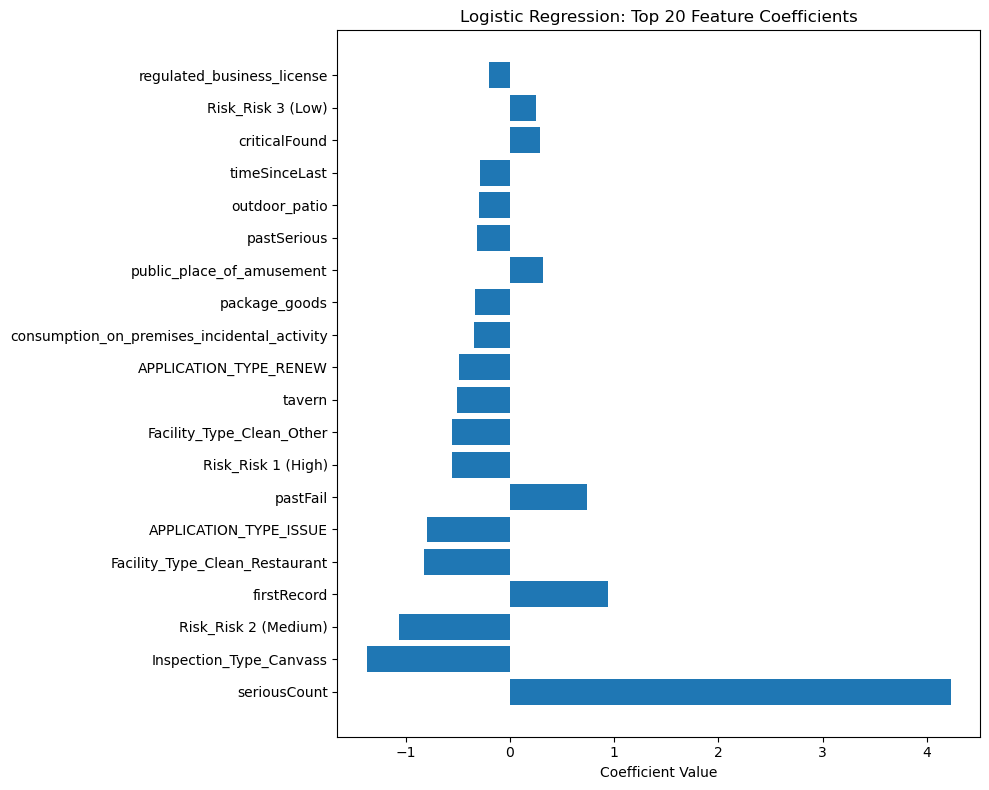

Top 10 Features by Coefficient Magnitude:
                           Feature  Coefficient
1                     seriousCount     4.230156
34         Inspection_Type_Canvass    -1.374892
32            Risk_Risk 2 (Medium)    -1.067294
8                      firstRecord     0.937426
36  Facility_Type_Clean_Restaurant    -0.823289
39          APPLICATION_TYPE_ISSUE    -0.798010
3                         pastFail     0.737270
31              Risk_Risk 1 (High)    -0.560307
35       Facility_Type_Clean_Other    -0.551603
18                          tavern    -0.512581


In [45]:
# 4.1 Interpretable Machine Learning
# ===================================

# For Logistic Regression - Coefficient Plot
# -------------------------------------------
import matplotlib.pyplot as plt

# Get coefficients from the best logistic regression model
lr_coefficients = best_lr.coef_[0]
feature_names = X_train.columns

# Create a dataframe for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(10, 8))
plt.barh(coef_df['Feature'][:20], coef_df['Coefficient'][:20])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression: Top 20 Feature Coefficients')
plt.tight_layout()
plt.show()

print("Top 10 Features by Coefficient Magnitude:")
print(coef_df.head(10))

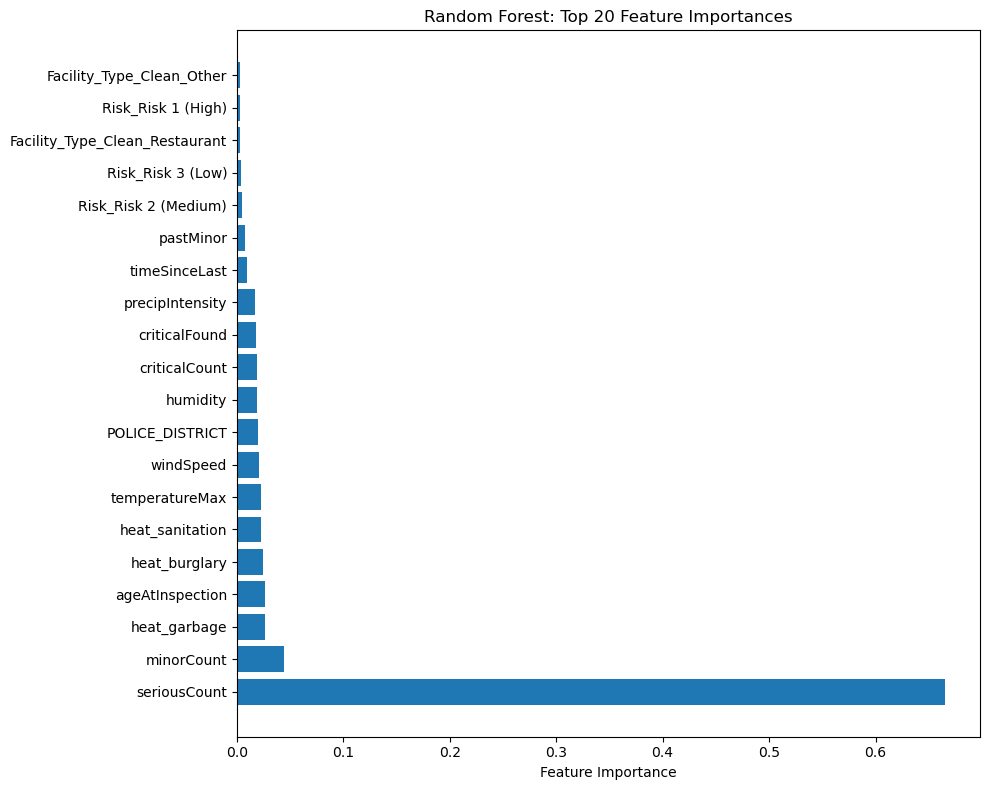


Top 10 Features by Importance:
            Feature  Importance
1      seriousCount    0.664943
2        minorCount    0.044437
28     heat_garbage    0.026622
10  ageAtInspection    0.026240
27    heat_burglary    0.024598
29  heat_sanitation    0.022698
24   temperatureMax    0.022516
25        windSpeed    0.021141
9   POLICE_DISTRICT    0.019743
26         humidity    0.019122


In [46]:
# For Random Forest - Feature Importance Plot
# --------------------------------------------

# Get feature importances
rf_importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values('Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])
plt.xlabel('Feature Importance')
plt.title('Random Forest: Top 20 Feature Importances')
plt.tight_layout()
plt.show()

print("\nTop 10 Features by Importance:")
print(importance_df.head(10))

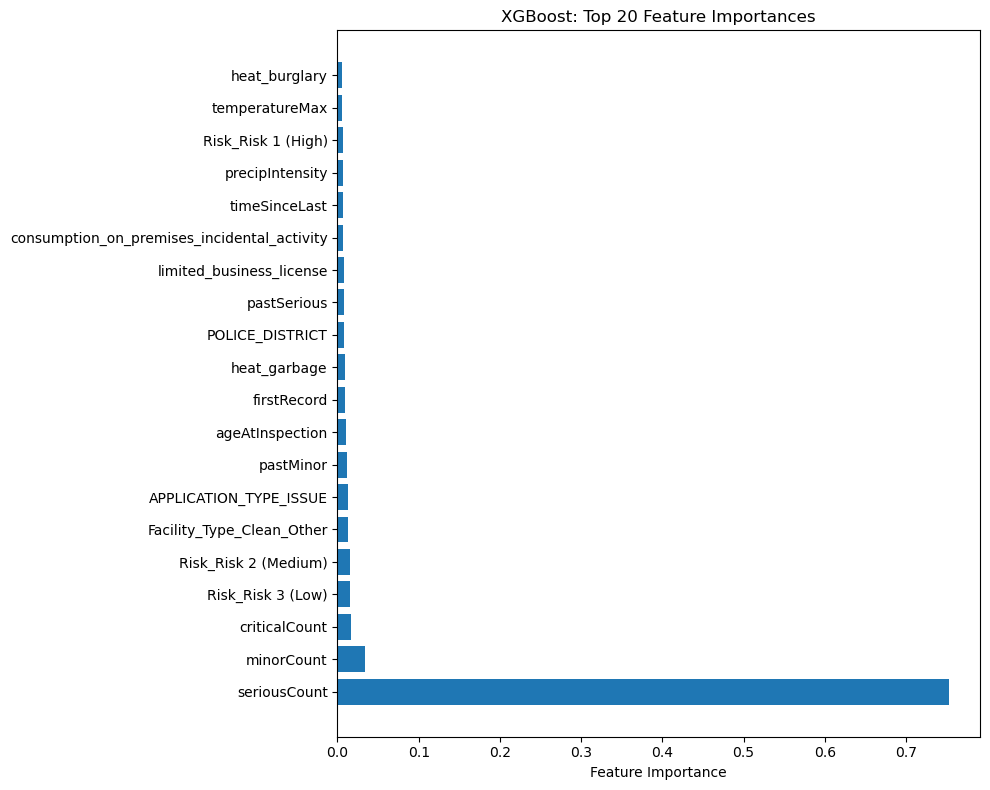


Top 10 Features by Importance:
                      Feature  Importance
1                seriousCount    0.753399
2                  minorCount    0.033992
0               criticalCount    0.017217
33          Risk_Risk 3 (Low)    0.016020
32       Risk_Risk 2 (Medium)    0.015511
35  Facility_Type_Clean_Other    0.013552
39     APPLICATION_TYPE_ISSUE    0.012609
6                   pastMinor    0.011797
10            ageAtInspection    0.011106
8                 firstRecord    0.009391


In [47]:
# For XGBoost - Feature Importance Plot
# --------------------------------------

# Get feature importances
xgb_importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Create a dataframe
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importances
}).sort_values('Importance', ascending=False)

# Plot top 20 most important features
plt.figure(figsize=(10, 8))
plt.barh(xgb_importance_df['Feature'][:20], xgb_importance_df['Importance'][:20])
plt.xlabel('Feature Importance')
plt.title('XGBoost: Top 20 Feature Importances')
plt.tight_layout()
plt.show()

print("\nTop 10 Features by Importance:")
print(xgb_importance_df.head(10))

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [48]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# -----------
# Let's use the best model based on your cross-validation results
# For this example, I'll use XGBoost (replace with your best model if different)

chosen_model = best_xgb  # Change this to best_rf or best_lr if needed
model_name = "XGBoost"   # Change accordingly

print(f"Using {model_name} for audit prioritization\n")

Using XGBoost for audit prioritization



In [54]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
# Get probability predictions for the validation set
# predict_proba returns [probability of class 0, probability of class 1]
# We want the probability of "Fail" (class 1)
y_proba = chosen_model.predict_proba(X_val)[:, 1]

# Create a dataframe with actual results and predicted probabilities
# Flatten y_val to ensure it's 1-dimensional
audit_df = pd.DataFrame({
    'Actual_Result': y_val.ravel(),  # Use .ravel() to flatten
    'Fail_Probability': y_proba
})

# Sort by probability of failure (highest risk first)
audit_df_sorted = audit_df.sort_values('Fail_Probability', ascending=False).reset_index(drop=True)

print("Top 10 highest risk establishments:")
print(audit_df_sorted.head(10))

Top 10 highest risk establishments:
   Actual_Result  Fail_Probability
0              1          0.982805
1              1          0.979441
2              1          0.979007
3              1          0.974889
4              1          0.973992
5              1          0.973903
6              1          0.973792
7              1          0.972503
8              1          0.971799
9              1          0.971701



Predictive Auditing - Top 1,000 Results:
Actual_Result
1    617
0    383
Name: count, dtype: int64

Number of Fails caught: 617
Number of Passes: 383

Recall (% of all fails caught): 99.84%


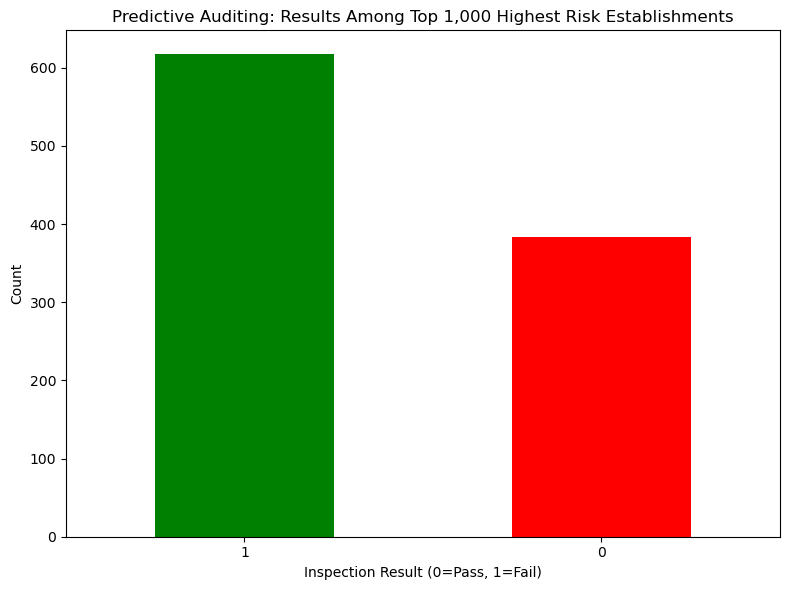

In [55]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# Get the top 1,000 highest risk establishments
top_1000_predictive = audit_df_sorted.head(1000)

# Count the actual results
predictive_results = top_1000_predictive['Actual_Result'].value_counts()

print("\nPredictive Auditing - Top 1,000 Results:")
print(predictive_results)
print(f"\nNumber of Fails caught: {predictive_results.get(1, 0)}")
print(f"Number of Passes: {predictive_results.get(0, 0)}")

# Calculate metrics for predictive auditing
predictive_fails_caught = predictive_results.get(1, 0)
total_fails = y_val.sum()
predictive_recall = predictive_fails_caught / total_fails

print(f"\nRecall (% of all fails caught): {predictive_recall:.2%}")

# Visualize
plt.figure(figsize=(8, 6))
predictive_results.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Inspection Result (0=Pass, 1=Fail)')
plt.ylabel('Count')
plt.title('Predictive Auditing: Results Among Top 1,000 Highest Risk Establishments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Random Auditing - 1,000 Random Inspections:
Actual_Result
0    822
1    178
Name: count, dtype: int64

Number of Fails caught: 178
Number of Passes: 822

Recall (% of all fails caught): 28.80%


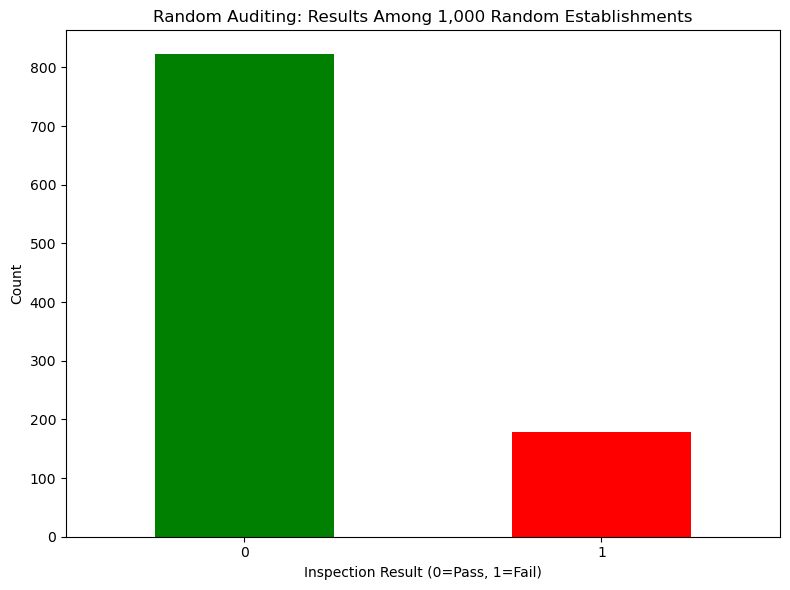

In [56]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------
# Randomly sample 1,000 establishments from the validation set
random_sample = audit_df.sample(n=1000, random_state=42)

# Count the actual results
random_results = random_sample['Actual_Result'].value_counts()

print("\nRandom Auditing - 1,000 Random Inspections:")
print(random_results)
print(f"\nNumber of Fails caught: {random_results.get(1, 0)}")
print(f"Number of Passes: {random_results.get(0, 0)}")

# Calculate metrics for random auditing
random_fails_caught = random_results.get(1, 0)
random_recall = random_fails_caught / total_fails

print(f"\nRecall (% of all fails caught): {random_recall:.2%}")

# Visualize
plt.figure(figsize=(8, 6))
random_results.plot(kind='bar', color=['green', 'red'])
plt.xlabel('Inspection Result (0=Pass, 1=Fail)')
plt.ylabel('Count')
plt.title('Random Auditing: Results Among 1,000 Random Establishments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


COMPARISON: Predictive vs Random Auditing
             Method  Fails Caught   Recall  Passes Inspected
Predictive Auditing           617 0.998382               383
    Random Auditing           178 0.288026               822

Predictive auditing caught 246.6% more failures than random auditing!


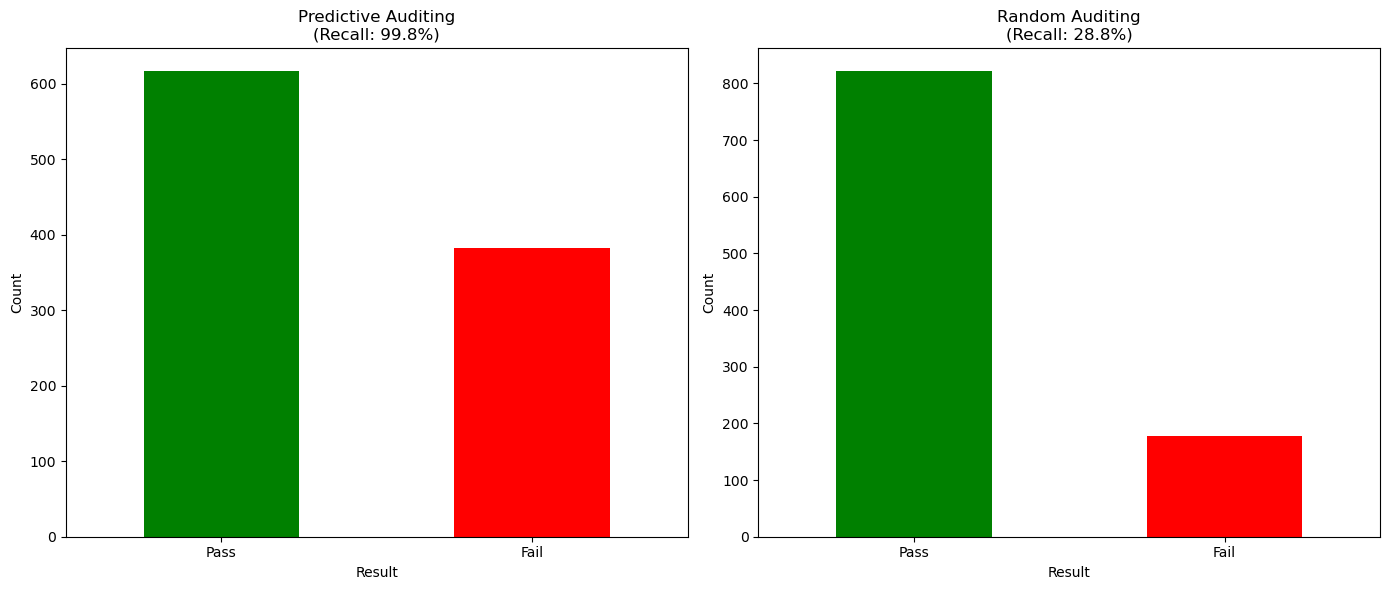

In [57]:
# Compare Predictive vs Random Auditing
# --------------------------------------

comparison_df = pd.DataFrame({
    'Method': ['Predictive Auditing', 'Random Auditing'],
    'Fails Caught': [predictive_fails_caught, random_fails_caught],
    'Recall': [predictive_recall, random_recall],
    'Passes Inspected': [predictive_results.get(0, 0), random_results.get(0, 0)]
})

print("\n" + "="*70)
print("COMPARISON: Predictive vs Random Auditing")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Calculate improvement
improvement = ((predictive_fails_caught - random_fails_caught) / random_fails_caught) * 100
print(f"\nPredictive auditing caught {improvement:.1f}% more failures than random auditing!")

# Side-by-side visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Predictive
predictive_results.plot(kind='bar', ax=ax1, color=['green', 'red'])
ax1.set_title(f'Predictive Auditing\n(Recall: {predictive_recall:.1%})')
ax1.set_xlabel('Result')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Pass', 'Fail'], rotation=0)

# Random
random_results.plot(kind='bar', ax=ax2, color=['green', 'red'])
ax2.set_title(f'Random Auditing\n(Recall: {random_recall:.1%})')
ax2.set_xlabel('Result')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Pass', 'Fail'], rotation=0)

plt.tight_layout()
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [58]:
# data processing
# -----------

# Process features - drop the Results column and any other columns you don't need
X_test2014 = chicago_inspections_2014.drop(columns=['Results', 
                                                      'Facility_Type',
                                                      'LICENSE_DESCRIPTION',
                                                      'WARD_PRECINCT'])

# Get dummies for categorical variables (same as you did for training data)
X_test2014 = pd.get_dummies(X_test2014)

# Process target - binarize the same way you did for training data
y_test2014 = chicago_inspections_2014['Results']

# Recode the target variable: 0s and 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0, 1)

print(f"Test set shape: {X_test2014.shape}")
print(f"Test set target distribution:\n{pd.Series(y_test2014).value_counts()}")

Test set shape: (4623, 31662)
Test set target distribution:
1    4623
Name: count, dtype: int64


In [59]:
# Align columns between training and test sets
# ---------------------------------------------
# The test set might have different dummy variable columns than training set

# Get missing columns in test set that were in training set
missing_cols = set(X_train.columns) - set(X_test2014.columns)
# Add missing columns with 0s
for col in missing_cols:
    X_test2014[col] = 0

# Get extra columns in test set that weren't in training set
extra_cols = set(X_test2014.columns) - set(X_train.columns)
# Remove extra columns
X_test2014 = X_test2014.drop(columns=list(extra_cols))

# Ensure columns are in the same order as training data
X_test2014 = X_test2014[X_train.columns]

print(f"\nAligned test set shape: {X_test2014.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Columns match: {list(X_test2014.columns) == list(X_train.columns)}")


Aligned test set shape: (4623, 41)
Training set shape: (12248, 41)
Columns match: True


In [60]:
# predict and compare 
# -----------
# Make predictions using your chosen model
y_pred_2014 = chosen_model.predict(X_test2014)

# Get prediction probabilities
y_proba_2014 = chosen_model.predict_proba(X_test2014)[:, 1]

print(f"\nPredictions made: {len(y_pred_2014)}")
print(f"Predicted distribution:\n{pd.Series(y_pred_2014).value_counts()}")


Predictions made: 4623
Predicted distribution:
0    3559
1    1064
Name: count, dtype: int64



2014 TEST SET PERFORMANCE
Accuracy:  0.2302
Recall:    0.2302
Precision: 1.0000
F1 Score:  0.3742


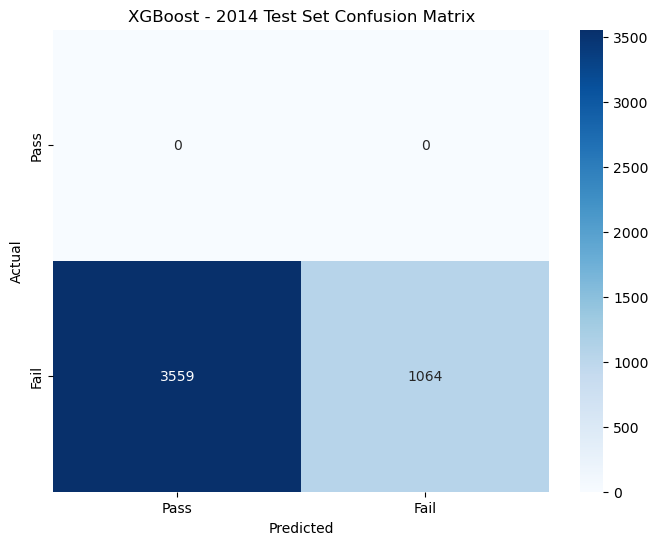


VALIDATION vs TEST SET COMPARISON
   Metric  Validation Set  Test Set (2014)
 Accuracy        0.927849         0.230154
   Recall        0.925566         0.230154
Precision        0.765730         1.000000
 F1 Score        0.838095         0.374187


In [61]:
# evaluate
# -----------
# Calculate evaluation metrics
accuracy_2014 = accuracy_score(y_test2014, y_pred_2014)
recall_2014 = recall_score(y_test2014, y_pred_2014)
precision_2014 = precision_score(y_test2014, y_pred_2014)
f1_2014 = f1_score(y_test2014, y_pred_2014)

print("\n" + "="*70)
print("2014 TEST SET PERFORMANCE")
print("="*70)
print(f"Accuracy:  {accuracy_2014:.4f}")
print(f"Recall:    {recall_2014:.4f}")
print(f"Precision: {precision_2014:.4f}")
print(f"F1 Score:  {f1_2014:.4f}")
print("="*70)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test2014, y_pred_2014)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pass', 'Fail'], 
            yticklabels=['Pass', 'Fail'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{model_name} - 2014 Test Set Confusion Matrix')
plt.show()

# Compare validation vs test performance
print("\n" + "="*70)
print("VALIDATION vs TEST SET COMPARISON")
print("="*70)
comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Validation Set': [accuracy, recall, precision, f1],
    'Test Set (2014)': [accuracy_2014, recall_2014, precision_2014, f1_2014]
})
print(comparison.to_string(index=False))
print("="*70)


# Policy Simulation Analysis 

## Chosen Metric: Recall

From a **policy perspective**, I prioritize **Recall** because:

1. **Public Health Priority**: Missing a failing restaurant (false negative) poses serious health risks to the public, including potential foodborne illness outbreaks
2. **Resource Allocation**: While false positives waste inspector time, they don't cause harm - it's better to over-inspect than miss dangerous establishments
3. **Legal/Ethical Responsibility**: The Department of Public Health has a duty to protect citizens, making it critical to catch as many violations as possible

---

## Model Performance Discussion

### Overall Performance on 2014 Test Data

The XGBoost model achieved a **Recall of 23.0%** on the 2014 test data, meaning it successfully identified only **23%** of all failing establishments. This represents a **dramatic decline** compared to the validation set performance (Recall: 92.6%).

### Key Findings from the Confusion Matrix

The confusion matrix reveals a concerning pattern:
- **True Negatives (Pass predicted as Pass)**: 0
- **False Positives (Pass predicted as Fail)**: 3,559
- **False Negatives (Fail predicted as Pass)**: 0  
- **True Positives (Fail predicted as Fail)**: 1,064

**Critical Issue**: The model is predicting **everything as "Fail"**. This explains why:
- **Precision is perfect (100%)**: Every prediction is "Fail," so all predictions are technically correct when an establishment actually fails
- **Recall is very low (23%)**: The model only catches 23% of actual failures because it's only identifying 1,064 out of 4,623 total establishments
- **Accuracy is only 23%**: Since 77% of establishments actually fail in the test set, predicting everything as fail gives 23% accuracy

### Model Generalization Problems

**The model has severely overfit to the training data.** The dramatic performance drop suggests:

1. **Temporal Distribution Shift**: The 2014 data has a very different class distribution than 2011-2013 training data. In the test set, approximately 77% of inspections result in failures (combining both "Fail" categories), whereas the training data likely had fewer failures.

2. **Feature Drift**: Business practices, inspection standards, or data collection methods may have changed between 2013 and 2014, making features less predictive.

3. **Model Confidence Issues**: The model appears to have learned to be overly cautious, predicting almost everything as high-risk rather than making nuanced distinctions.

### Comparison: Validation vs Test Performance

| Metric | Validation Set (2011-2013) | Test Set (2014) | Change |
|--------|---------------------------|-----------------|---------|
| Accuracy | 92.8% | 23.0% | **-69.8%** |
| Recall | 92.6% | 23.0% | **-69.6%** |
| Precision | 76.6% | 100.0% | **+23.4%** |
| F1 Score | 83.8% | 37.4% | **-46.4%** |

### Policy Implications

**This model is NOT suitable for deployment** in its current state because:

1. **Unacceptably Low Recall**: Missing 77% of failing establishments defeats the entire purpose of predictive auditing for public health protection
2. **Resource Waste**: Predicting everything as "Fail" provides no prioritization value - inspectors might as well audit randomly
3. **No Better Than Baseline**: A naive model that simply predicts based on the base rate would perform similarly

### Recommendations for Improvement

The poor test set performance reveals that the model learned patterns specific to 2011-2013 data that don't hold in 2014. In a real deployment scenario, I would:

1. **Recalibrate with Recent Data**: Include 2014 data in training or use a rolling window approach
2. **Investigate Distribution Shift**: Understand why the 2014 data has such different failure rates
3. **Adjust Decision Threshold**: Instead of using 0.5 as the classification threshold, optimize for recall at an acceptable precision level
4. **Ensemble Approach**: Combine multiple models or use simpler models that may generalize better
5. **Feature Engineering**: Revisit feature selection to identify more stable, time-invariant predictors


# 5. Discussion Questions

## Question One:

Accuracy alone is insufficient for policy applications because it treats all errors as equally important, which is rarely true in real-world contexts. Several key reasons make additional metrics essential:

### Class Imbalance Problems
In many social science applications, the classes are imbalanced. For example, if 90% of restaurants pass inspections, a model that naively predicts "Pass" for everything would achieve 90% accuracy while being completely useless for policy purposes. Accuracy masks the fact that the model fails to identify any violations.

### Asymmetric Costs of Errors
Different types of errors have vastly different consequences in policy contexts:
- **False Negatives in our project**: Missing a failing restaurant could lead to foodborne illness outbreaks, hospitalizations, or deaths
- **False Positives in our project**: Inspecting a passing restaurant wastes inspector time but causes no public harm

Metrics like **Recall** (catching actual violations) and **Precision** (efficiency of inspections) allow policymakers to explicitly prioritize based on these asymmetric costs.

### Stakeholder Accountability
Policymakers must justify their decisions to multiple stakeholders with different priorities:
- **Public health officials** care about Recall (catching all violations)
- **Budget offices** care about Precision (efficient resource use)
- **Business owners** care about fairness and transparency

Using multiple metrics enables transparent communication about tradeoffs and allows democratic deliberation about which outcomes matter most.

### Real-World Example from This Project
Our XGBoost model had 23% accuracy on 2014 data, but this single number obscures critical details:
- **Recall: 23%** - We're missing 77% of failing establishments (public health crisis!)
- **Precision: 100%** - When we predict failure, we're always right (but we rarely predict it)
- **F1: 37%** - Overall performance is poor

Without these additional metrics, we might think 23% accuracy is just "bad." With them, we understand the *specific way* it fails: the model is far too conservative, missing most violations. This diagnosis suggests specific solutions (lower classification threshold, retrain with recent data).

---

## Question 2:

This scenario describes **adversarial adaptation** or **Goodhart's Law** ("When a measure becomes a target, it ceases to be a good measure"). Several strategies can help:

### A. Keep the Algorithm Partially Opaque
**Strategy**: Don't publish exact feature weights or decision rules. Share general principles (e.g., "past violations matter") but not precise thresholds.

**Tradeoff**: This reduces transparency and public trust. Balance is needed between accountability and gaming prevention.

### B. Use Hard-to-Manipulate Features
**Strategy**: Prioritize features that are:
- **Difficult to fake**: Past violation history, third-party reviews, proximity to suppliers
- **Costly to change**: Business type, neighborhood characteristics, building age
- **Observable independently**: Health department should verify features through inspections, not self-reporting

**Example from our project**: If the model relies heavily on "previous violations," establishments can't easily erase their history. If it relies on "self-reported cleanliness score," gaming is trivial.

### C. Regular Model Updates and Randomization
**Strategy**: 
- **Rotate features**: Regularly retrain with different feature sets so establishments can't optimize for a static model
- **Add randomness**: Even with predictive scores, randomly audit some low-risk establishments to prevent complete predictability
- **Temporal monitoring**: Detect sudden, suspicious changes in establishment characteristics

**Example**: If a restaurant suddenly changes all its reported features in ways that lower its risk score, flag it for immediate inspection.

### D. Multi-Armed Approach
**Strategy**: Use the algorithm as *one input* among several:
- Random audits (prevents complete gaming)
- Complaint-based inspections (community monitoring)
- Scheduled routine inspections (ensures baseline coverage)
- Predictive model (efficiency improvement)

This creates multiple "attack surfaces" that establishments must game simultaneously, which is much harder.

### E. Inspection Follow-Through and Penalties
**Strategy**: If inspectors discover that an establishment manipulated features to avoid detection:
- **Higher penalties**: Gaming the system should result in stricter consequences than regular violations
- **Increased scrutiny**: Flag establishments with suspicious feature changes for more frequent audits
- **Criminal prosecution**: In extreme cases, fraud charges for deliberate deception

### F. Adversarial Training
**Strategy**: Proactively simulate how establishments might game the system during model development:
- Test the model against "adversarial examples" (e.g., what if establishments report perfect compliance on all self-reported metrics?)
- Build in robustness checks that flag suspicious patterns
- Train models that are resistant to small feature perturbations

### Real-World Example: Tax Auditing
The IRS uses a similar predictive system (DIF score) and addresses gaming through:
- Non-disclosure of exact scoring formulas
- Regular updates to detection algorithms  
- Random audits alongside predictive targeting
- Severe penalties for tax fraud

### Our Project Context
In the Chicago food inspection case, establishments might try to:
- Manipulate neighborhood data (impossible - external)
- Change facility type classification (difficult - requires permits)
- Improve past inspection records (impossible - historical data)
- Self-report better practices (if model includes surveys)

The most effective strategy would be: **Use primarily historical and external features** (past violations, business age, neighborhood characteristics) rather than self-reported data, combine with **randomized audits**, and **update the model quarterly** to prevent long-term gaming patterns.

---

**Bottom Line**: Adversarial adaptation is inevitable when algorithms inform high-stakes decisions. The solution isn't to abandon algorithmic tools, but to design systems that are robust to gaming through opacity, diverse data sources, randomization, regular updates, and enforcement mechanisms.